In [1]:
import os
import sys
import json
import cv2
from PIL import Image
import typing
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../src/")
import utils

In [2]:
input_filepath = "../data/raw/"
ann1_filepath = "../data/raw/root_annotations/"

In [3]:
image_path= utils.list_files(input_filepath, ".png")
annotation1_path = utils.list_files(ann1_filepath, ".json")

In [4]:
depth_list = []
rgb_list = []

for path in image_path:
    if "rgb" in Path(path).stem:
        rgb_list.append(path)
    elif "depth" in Path(path).stem:
        depth_list.append(path)
    else:
        raise NameError("No identifier in image name. Neither <depth> nor <rgb> found in name")

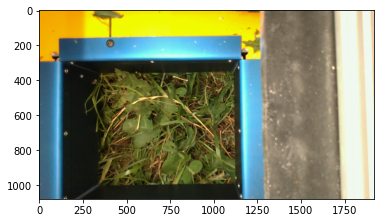

In [5]:
image = cv2.imread(rgb_list[8])
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


plt.imshow(image_hsv)
plt.imshow(image_rgb)
plt.show()

(1080, 1920, 3)


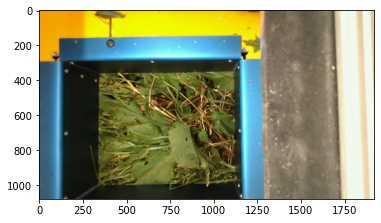

In [6]:
image = np.asarray(Image.open(rgb_list[0]))

print(image.shape)

plt.imshow(image[:,:,:3])

0.17783255208333323


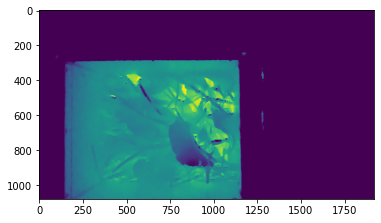

In [7]:
data = np.load('/zhome/3b/d/154066/repos/GALIROOT/data/interim/0.npy')

# image = np.zeros((1080,1920,3), dtype='uint8')

# for i in range(0,3):
#     print(i)
#     image[:,:,i] = data[:,:,i]

# print(image.shape)

depth_raw = data[:,:,3]
depth_remapped = (depth_raw-300)/(500-300)
depth_clipped = depth_remapped.clip(min=0, max=1)
depth = np.expand_dims(depth_clipped, axis=-1)
new = np.concatenate((data[:,:,0:3], depth), axis=-1)
print(new[:,:,3].mean())
plt.imshow(new[:,:,3])

[[[42 33 16]
  [41 29  0]
  [45 33  2]
  ...
  [69 81 26]
  [69 75 35]
  [67 73 33]]

 [[40 30 18]
  [55 45 15]
  [61 51 21]
  ...
  [74 83 29]
  [74 80 38]
  [69 75 33]]

 [[56 42 34]
  [65 55 27]
  [82 72 44]
  ...
  [76 84 30]
  [75 78 37]
  [70 73 32]]

 ...

 [[55 56 18]
  [59 55 17]
  [61 57 19]
  ...
  [27 31 26]
  [29 33 26]
  [31 35 28]]

 [[54 56 22]
  [55 51 15]
  [62 58 22]
  ...
  [24 28 23]
  [28 32 25]
  [32 36 29]]

 [[57 59 27]
  [57 54 20]
  [63 60 26]
  ...
  [23 27 22]
  [25 29 24]
  [30 34 29]]]
[[[48 39 20]
  [50 40  8]
  [61 51 19]
  ...
  [52 46 20]
  [47 41 17]
  [48 42 18]]

 [[47 38 19]
  [54 39  9]
  [62 47 17]
  ...
  [46 47 18]
  [49 45 20]
  [49 45 20]]

 [[44 37 18]
  [57 42 12]
  [60 45 15]
  ...
  [49 49 18]
  [50 44 20]
  [48 42 18]]

 ...

 [[64 69 39]
  [78 75 41]
  [90 87 53]
  ...
  [28 29 20]
  [26 27 18]
  [25 26 17]]

 [[58 68 43]
  [71 71 38]
  [76 76 43]
  ...
  [28 29 20]
  [24 25 19]
  [25 26 20]]

 [[56 65 47]
  [64 65 38]
  [68 69 42]
  .

KeyboardInterrupt: 

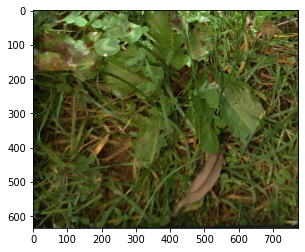

In [8]:
from src.data.mean_std_dataset import MeanStdDataset, calculate_rgb_mean_std
import torch

dataset = MeanStdDataset('/zhome/3b/d/154066/repos/GALIROOT/data/interim/')
image_loader = torch.utils.data.DataLoader(dataset,
                    batch_size=1,
                    num_workers=0,
                    shuffle=False)
for data in image_loader:
    image = data['image'][:,:,:,0:3]
    image_np = image.detach().numpy().squeeze(0).astype('uint8')

    print(image_np)
    plt.imshow(image_np)
